### IMPORT LIBRARY YANG DIGUNAKAN ###
Pada tahap ini melakukan deklarasi atau import library python yang digunakan 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
import kagglehub
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

### MENDOWNLOAD DATA DARI KAGGLE ###
Tahap ini adalah mendownload data langsung dari kaggle menggunakan library kagglehub

In [ ]:
# Download latest version
path = kagglehub.dataset_download("adilshamim8/student-depression-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/student-depression-dataset


### GATHERING DATA ###
Tahap ini adalah tahap Data Wrangling yang berguna untuk mengumpulkan data dari berbagai sumber

In [ ]:
df = pd.read_csv(path + '/student_depression_dataset.csv')
df.head()

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,'5-6 hours',Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,'5-6 hours',Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,'Less than 5 hours',Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,'7-8 hours',Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,'5-6 hours',Moderate,M.Tech,Yes,1.0,1.0,No,0


### ASSESING DATA ###
masih dalam tahap Data Wrangling yang berguna untuk menilai kualitas dan struktur yang salah pada dataset yang digunakan

In [ ]:
df.describe()

,id,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Depression
count,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000
mean,70442.149421,25.822300,3.141214,0.000430,7.656104,2.943837,0.000681,7.156984,0.585499
std,40641.175216,4.905687,1.381465,0.043992,1.470707,1.361148,0.044394,3.707642,0.492645
min,2.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,35039.000000,21.000000,2.000000,0.000000,6.290000,2.000000,0.000000,4.000000,0.000000
50%,70684.000000,25.000000,3.000000,0.000000,7.770000,3.000000,0.000000,8.000000,1.000000
75%,105818.000000,30.000000,4.000000,0.000000,8.920000,4.000000,0.000000,10.000000,1.000000
max,140699.000000,59.000000,5.000000,5.000000,10.000000,5.000000,4.000000,12.000000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  object 
 2   Age                                    27901 non-null  float64
 3   City                                   27901 non-null  object 
 4   Profession                             27901 non-null  object 
 5   Academic Pressure                      27901 non-null  float64
 6   Work Pressure                          27901 non-null  float64
 7   CGPA                                   27901 non-null  float64
 8   Study Satisfaction                     27901 non-null  float64
 9   Job Satisfaction                       27901 non-null  float64
 10  Sleep Duration                         27901 non-null  object 
 11  Di

In [ ]:
df.isna().sum()

,0
id,0
Gender,0
Age,0
City,0
Profession,0
Academic Pressure,0
Work Pressure,0
CGPA,0
Study Satisfaction,0
Job Satisfaction,0


### Exploratory Data Analysis (EDA) ###
Tahap ini melakukan analisis data yang bertujuan untuk mengeksplorasi dan mengenal dataset yang digunakan

<ipython-input-10-f54f26153758>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Depression', data=df, palette="viridis")


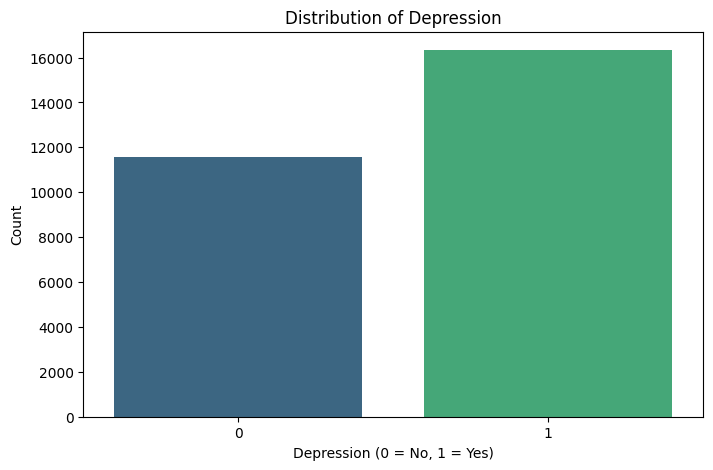

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(x='Depression', data=df, palette="viridis")
plt.title("Distribution of Depression")
plt.xlabel("Depression (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

Grafik di atas merupakan grafik distribusi data depresi pada dataset. Berdasarkan grafik di atas data orang yang mengalami depresi lebih tinggi dari data orang yang tidak mengalami depresi

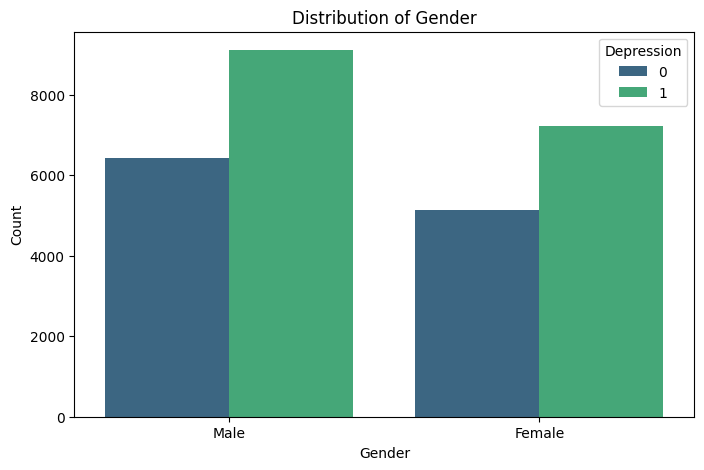

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(x='Gender', data=df, palette="viridis", hue='Depression')
plt.title("Distribution of Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

Grafik di atas merupakan distribusi data depresi pada jenis kelamin. Terlihat yang menjadi objek penelitian dominan laki-laki daripada perempuan. Grafik orang yang mengalami depresi pada jenis kelamin laki-laki lebih tinggi dari grafik orang yang mengalami depresi pada jenis kelamin perempuan dan sebaliknya.

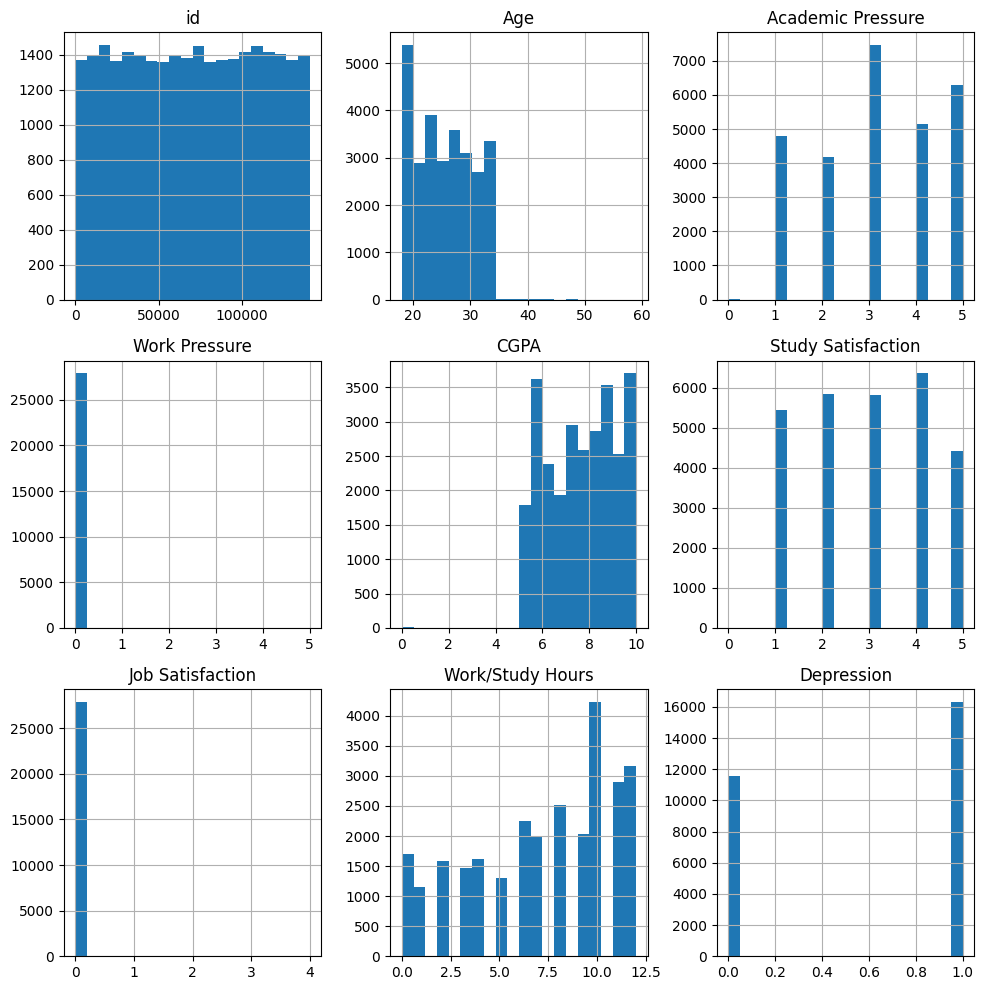

In [ ]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
df[num_cols].hist(figsize=(10, 10), bins=20)
plt.tight_layout()
plt.show()

Berdasarkan histogram di atas yang merupakan persebaran setiap data numerik pada dataset. Terlihat persebaran data pada dataset ini tidak terdistribusi normal sehingga akan dilakukan strandrisasi atau normalisasi pada dataset sebelum melakukan modeling.

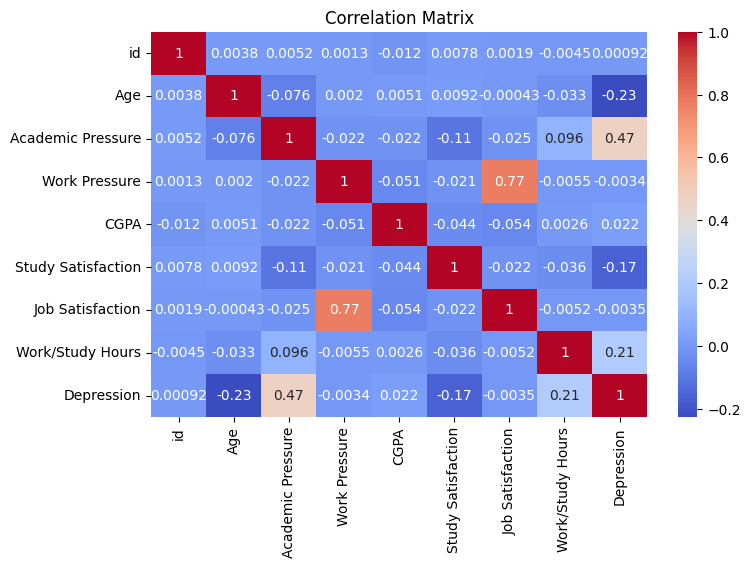

In [ ]:
plt.figure(figsize=(8,5))
corr_amtrix = df[num_cols].corr()
sns.heatmap(corr_amtrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

Berdasarkan matriks korelasi di atas beberapa data memiliki korelasi dengan data depresi atau data target. Seperti data Academic Pressure, CGPA dan Work/Study Hours.

### SPLITTING DATA, TRANSFORMATION DATA, MODELING AND EVALUATION ###
Tahap ini merupakan tahapan penting dalam proyek machine learning karena bertujuan untuk melatih model machine learning dan melakukan evalusi hasil dari model yang sudah dilatih. Sebelum malakukan pelatihan, dataset dibagi manjadi data train dan test terlebih dahulu setelah itu dilakukan standarisasi yang sudah dijelaskan pada grafik sebekumnya dan encoded untuk merubah data kategorikal menjadi numerik.

In [ ]:
X = df.drop(columns=['id', 'Depression'], axis=1)
y = df['Depression']

num_cols=X.select_dtypes(include=['int64','float64']).columns.tolist()
cat_cols=X.select_dtypes(include=['object']).columns.tolist()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

preprocessing = ColumnTransformer([('scaler',StandardScaler(),num_cols),
                                  ('encoder',OneHotEncoder(handle_unknown='ignore', sparse_output=False),cat_cols)])

models = {'Logistic Regression': LogisticRegression(),
          'Gradient Boosting': GradientBoostingClassifier(),
          'Decision Tree' : DecisionTreeClassifier()}

results={}
for name,model in models.items():
    pipeline=Pipeline([('pre',preprocessing),
                      ('model',model)])
    pipeline.fit(X_train,y_train)
    y_pred=pipeline.predict(X_test)
    acc=accuracy_score(y_test,y_pred)
    results[name]=acc
    print(f'Accuracy score for {name} is {acc}')

Accuracy score for Logistic Regression is 0.8394552947500448
Accuracy score for Gradient Boosting is 0.8412470883354237
Accuracy score for Decision Tree is 0.766350116466583
